In [1]:
import json
import pandas as pd

from utils.plotter import plot_gantt_jobs
from utils.plotter import plot_gantt_machines
from utils.simple_priority_heuristics import schedule_spt

from utils.checker import check_machine_conflicts
from utils.checker import check_job_machine_sequence
from utils.checker import check_job_machine_sequence_dict

In [2]:
import numpy as np
import random

In [3]:
# Datei laden
with open("data/jobshop_instances_named.json", "r", encoding="utf-8") as f:
    jobshop_instances = json.load(f)

instance =  jobshop_instances["instance ft10"]
for job_name in sorted(instance, key=lambda x: int(x.split()[1])):
    ops = instance[job_name]
    print(f"{job_name}:\t{ops}")

job 0:	[[0, 29], [1, 78], [2, 9], [3, 36], [4, 49], [5, 11], [6, 62], [7, 56], [8, 44], [9, 21]]
job 1:	[[0, 43], [2, 90], [4, 75], [9, 11], [3, 69], [1, 28], [6, 46], [5, 46], [7, 72], [8, 30]]
job 2:	[[1, 91], [0, 85], [3, 39], [2, 74], [8, 90], [5, 10], [7, 12], [6, 89], [9, 45], [4, 33]]
job 3:	[[1, 81], [2, 95], [0, 71], [4, 99], [6, 9], [8, 52], [7, 85], [3, 98], [9, 22], [5, 43]]
job 4:	[[2, 14], [0, 6], [1, 22], [5, 61], [3, 26], [4, 69], [8, 21], [7, 49], [9, 72], [6, 53]]
job 5:	[[2, 84], [1, 2], [5, 52], [3, 95], [8, 48], [9, 72], [0, 47], [6, 65], [4, 6], [7, 25]]
job 6:	[[1, 46], [0, 37], [3, 61], [2, 13], [6, 32], [5, 21], [9, 32], [8, 89], [7, 30], [4, 55]]
job 7:	[[2, 31], [0, 86], [1, 46], [5, 74], [4, 32], [6, 88], [8, 19], [9, 48], [7, 36], [3, 79]]
job 8:	[[0, 76], [1, 69], [3, 76], [5, 51], [2, 85], [9, 11], [6, 40], [7, 89], [4, 26], [8, 74]]
job 9:	[[1, 85], [0, 13], [2, 61], [6, 7], [8, 64], [9, 76], [5, 47], [3, 52], [4, 90], [7, 45]]


In [4]:
job_set_list = []

# Alle Jobs sortieren
sorted_job_names = sorted(instance, key=lambda x: int(x.split()[1]))

# Erzeuge 5 vollständige Varianten der Instanz mit umbenannten Jobs
for variant in range(5):
    job_dict = {}
    for original_index, job_name in enumerate(sorted_job_names):
        new_name = f"Job {variant:02d}_{original_index}"  # z. B. job 00_0, job 01_4, ...
        job_dict[new_name] = instance[job_name]
    job_set_list.append(job_dict)

# Beispielausgabe
for idx, job_set in enumerate(job_set_list):
    print(f"\n--- Jobset {idx} ---")
    for job_name, ops in job_set.items():
        print(f"{job_name}:\t{ops}")




--- Jobset 0 ---
Job 00_0:	[[0, 29], [1, 78], [2, 9], [3, 36], [4, 49], [5, 11], [6, 62], [7, 56], [8, 44], [9, 21]]
Job 00_1:	[[0, 43], [2, 90], [4, 75], [9, 11], [3, 69], [1, 28], [6, 46], [5, 46], [7, 72], [8, 30]]
Job 00_2:	[[1, 91], [0, 85], [3, 39], [2, 74], [8, 90], [5, 10], [7, 12], [6, 89], [9, 45], [4, 33]]
Job 00_3:	[[1, 81], [2, 95], [0, 71], [4, 99], [6, 9], [8, 52], [7, 85], [3, 98], [9, 22], [5, 43]]
Job 00_4:	[[2, 14], [0, 6], [1, 22], [5, 61], [3, 26], [4, 69], [8, 21], [7, 49], [9, 72], [6, 53]]
Job 00_5:	[[2, 84], [1, 2], [5, 52], [3, 95], [8, 48], [9, 72], [0, 47], [6, 65], [4, 6], [7, 25]]
Job 00_6:	[[1, 46], [0, 37], [3, 61], [2, 13], [6, 32], [5, 21], [9, 32], [8, 89], [7, 30], [4, 55]]
Job 00_7:	[[2, 31], [0, 86], [1, 46], [5, 74], [4, 32], [6, 88], [8, 19], [9, 48], [7, 36], [3, 79]]
Job 00_8:	[[0, 76], [1, 69], [3, 76], [5, 51], [2, 85], [9, 11], [6, 40], [7, 89], [4, 26], [8, 74]]
Job 00_9:	[[1, 85], [0, 13], [2, 61], [6, 7], [8, 64], [9, 76], [5, 47], [3, 5

In [5]:
def get_all_machine_ids(job_shop_matrix):
    machines = set()
    for job in job_shop_matrix:
        for operation in job:
            machines.add(operation[0])
    return machines

In [6]:
day_0 = job_set_list[0]
for job_name in sorted(day_0, key=lambda x: int(x.split()[1])):
    ops = day_0[job_name]
    print(f"{job_name}:\t{ops}")

Job 00_0:	[[0, 29], [1, 78], [2, 9], [3, 36], [4, 49], [5, 11], [6, 62], [7, 56], [8, 44], [9, 21]]
Job 00_1:	[[0, 43], [2, 90], [4, 75], [9, 11], [3, 69], [1, 28], [6, 46], [5, 46], [7, 72], [8, 30]]
Job 00_2:	[[1, 91], [0, 85], [3, 39], [2, 74], [8, 90], [5, 10], [7, 12], [6, 89], [9, 45], [4, 33]]
Job 00_3:	[[1, 81], [2, 95], [0, 71], [4, 99], [6, 9], [8, 52], [7, 85], [3, 98], [9, 22], [5, 43]]
Job 00_4:	[[2, 14], [0, 6], [1, 22], [5, 61], [3, 26], [4, 69], [8, 21], [7, 49], [9, 72], [6, 53]]
Job 00_5:	[[2, 84], [1, 2], [5, 52], [3, 95], [8, 48], [9, 72], [0, 47], [6, 65], [4, 6], [7, 25]]
Job 00_6:	[[1, 46], [0, 37], [3, 61], [2, 13], [6, 32], [5, 21], [9, 32], [8, 89], [7, 30], [4, 55]]
Job 00_7:	[[2, 31], [0, 86], [1, 46], [5, 74], [4, 32], [6, 88], [8, 19], [9, 48], [7, 36], [3, 79]]
Job 00_8:	[[0, 76], [1, 69], [3, 76], [5, 51], [2, 85], [9, 11], [6, 40], [7, 89], [4, 26], [8, 74]]
Job 00_9:	[[1, 85], [0, 13], [2, 61], [6, 7], [8, 64], [9, 76], [5, 47], [3, 52], [4, 90], [7, 4

In [7]:
type(day_0)

dict

## I) Mittlere Zwischenankunftszeit t_a

### 1. Vektor der Bearbeitungszeiten auf der Engpassmaschine

#### a) Bestimmung der Engpassmaschine (7.12)

$$
m_{\text{max}} = \arg\max_{m \in M} T_m
$$

In [12]:
def get_engpassmaschine_from_dict(job_dict):
    machine_usage = {}
    for job_ops in job_dict.values():
        for machine, duration in job_ops:
            machine_usage[machine] = machine_usage.get(machine, 0) + duration
    return max(machine_usage, key=machine_usage.get)

# Engpass berechnen
engpass = get_engpassmaschine_from_dict(day_0)
print(f"Engpassmaschine (aus Dict): M{engpass}")

get_engpassmaschine_from_dict(day_0)

Engpassmaschine (aus Dict): M3


3

#### b) Vektor der Bearbeitungszeiten auf der Engpassmaschine erstellen

In [14]:
def get_vec_t_b_mmax_from_dict(job_dict):
    # Engpassmaschine bestimmen – mit bestehender Funktion
    engpassmaschine = get_engpassmaschine_from_dict(job_dict)

    # Vektor der Bearbeitungszeiten auf der Engpassmaschine
    vec_t_b_mmax = []
    for job in job_dict.values():
        duration = next((d for m, d in job if m == engpassmaschine), 0)
        vec_t_b_mmax.append(duration)

    return vec_t_b_mmax
    
get_vec_t_b_mmax_from_dict(day_0)

[36, 69, 39, 98, 26, 95, 61, 79, 76, 52]

### 2. Job-Wahrscheinlichkeiten

In [16]:
# Gleichverteilt 
n_jobs = len(day_0)
[1 / n_jobs] * n_jobs

[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

### 3. Berechne die mittlere Zwischenankunftszeit t_a nach Formel (7.16)

$$
t_a = \frac{\vec{p}^T \cdot \vec{t}_{b, m_{\text{max}}}}{u_{b, m_{\text{max}}}}
$$

- $t_a$: mittlere Zwischenankunftszeit  
- $\vec{p}$: Vektor der Wahrscheinlichkeiten der Arbeitspläne (bzw. Jobs)  
- $\vec{t}_{b, m_{\text{max}}}$: Vektor der Bearbeitungszeiten auf der Engpassmaschine  
- $u_{b, m_{\text{max}}}$: gewünschte Auslastung der Engpassmaschine


In [19]:
def get_interarrival_time_from_dict(job_dict, u_b_mmax=0.9):
    n_jobs = len(job_dict)
    p = [1 / n_jobs] * n_jobs  # Gleichverteilung
    vec_t_b_mmax = get_vec_t_b_mmax_from_dict(job_dict)  # Engpass-Zeiten je Job

    # Erwartungswert der Zeit auf der Engpassmaschine, skaliert durch Auslastung
    t_a = sum(p[i] * vec_t_b_mmax[i] for i in range(n_jobs)) / u_b_mmax
    return np.round(t_a, 2)

interarrival_time = get_interarrival_time_from_dict(day_0)
interarrival_time

70.11

## II) Ankunftszeiten

In [21]:
def generate_daily_jobs(job_dict, u_b_mmax=0.9, day_id=0, random_seed_jobs=12, random_seed_times=123):
    job_names = list(job_dict.keys())  # z. B. ['job 00_0', ..., 'job 00_9']
    n_jobs = len(job_names)

    # Permutiere Jobnamen
    np.random.seed(random_seed_jobs)
    shuffled_jobs = list(np.random.permutation(job_names))

    # Interarrival-Zeit auf Basis der Engpassmaschine
    t_a = get_interarrival_time_from_dict(job_dict, u_b_mmax=u_b_mmax)

    # Erzeuge Ankunftszeiten
    np.random.seed(random_seed_times)
    interarrival_times = np.random.exponential(scale=t_a, size=n_jobs)
    arrival_times = np.round(np.cumsum(interarrival_times), 2)

    df_day = pd.DataFrame({
        "Job-ID": shuffled_jobs,
        "Day-ID": [day_id] * n_jobs,
        "Ankunftszeit (Minuten)": arrival_times
    })

    return df_day

df_arrivals_first_day = generate_daily_jobs(day_0)
df_arrivals_first_day

,Job-ID,Day-ID,Ankunftszeit (Minuten)
0,Job 00_5,0,83.59
1,Job 00_8,0,107.22
2,Job 00_7,0,125.26
3,Job 00_0,0,181.45
4,Job 00_4,0,270.56
5,Job 00_9,0,309.13
6,Job 00_3,0,586.13
7,Job 00_2,0,667.09
8,Job 00_1,0,713.06
9,Job 00_6,0,747.96


In [22]:
def add_day(existing_df, job_dict, u_b_mmax=0.9, day_id=None):
    if day_id is None:
        day_id = 0 if existing_df.empty else existing_df["Day-ID"].max() + 1

    df_new_day = generate_daily_jobs(job_dict, u_b_mmax, day_id=day_id)

    return pd.concat([existing_df, df_new_day], ignore_index=True)


In [23]:
day_1 = job_set_list[1]

df_arrivals_week = add_day(df_arrivals_first_day, day_1)
df_arrivals_week

,Job-ID,Day-ID,Ankunftszeit (Minuten)
0,Job 00_5,0,83.59
1,Job 00_8,0,107.22
2,Job 00_7,0,125.26
3,Job 00_0,0,181.45
4,Job 00_4,0,270.56
5,Job 00_9,0,309.13
6,Job 00_3,0,586.13
7,Job 00_2,0,667.09
8,Job 00_1,0,713.06
9,Job 00_6,0,747.96


## III) Scheduling

### a) First Come First Serve

In [26]:
import pandas as pd

def schedule_fcfs_with_arrivals(job_dict, arrival_df):
    # Ankunftszeiten als Dict – Keys sind z. B. "job 00_0", "job 00_1", ...
    arrival_times = arrival_df.set_index("Job-ID")["Ankunftszeit (Minuten)"].to_dict()

    # Initialisierungen
    job_ready = {job_id: arrival_times[job_id] for job_id in job_dict}
    machine_ready = {}
    schedule = []

    # Sortiere Jobs nach Ankunftszeit
    sorted_jobs = arrival_df.sort_values(by="Ankunftszeit (Minuten)")["Job-ID"].tolist()

    # FCFS-Planung
    for job_id in sorted_jobs:
        for machine, duration in job_dict[job_id]:
            start = max(job_ready[job_id], machine_ready.get(machine, 0))
            end = start + duration

            schedule.append({
                'Job': job_id,
                'Machine': f'M{machine}',
                'Start': start,
                'Duration': duration,
                'End': end
            })

            job_ready[job_id] = end
            machine_ready[machine] = end

    return pd.DataFrame(schedule)



In [27]:
df_fcfs = schedule_fcfs_with_arrivals(day_0, df_arrivals_first_day)
df_fcfs

,Job,Machine,Start,Duration,End
0,Job 00_5,M2,83.59,84,167.59
1,Job 00_5,M1,167.59,2,169.59
2,Job 00_5,M5,169.59,52,221.59
3,Job 00_5,M3,221.59,95,316.59
4,Job 00_5,M8,316.59,48,364.59
...,...,...,...,...,...
95,Job 00_6,M5,3275.59,21,3296.59
96,Job 00_6,M9,3296.59,32,3328.59
97,Job 00_6,M8,3328.59,89,3417.59
98,Job 00_6,M7,3417.59,30,3447.59


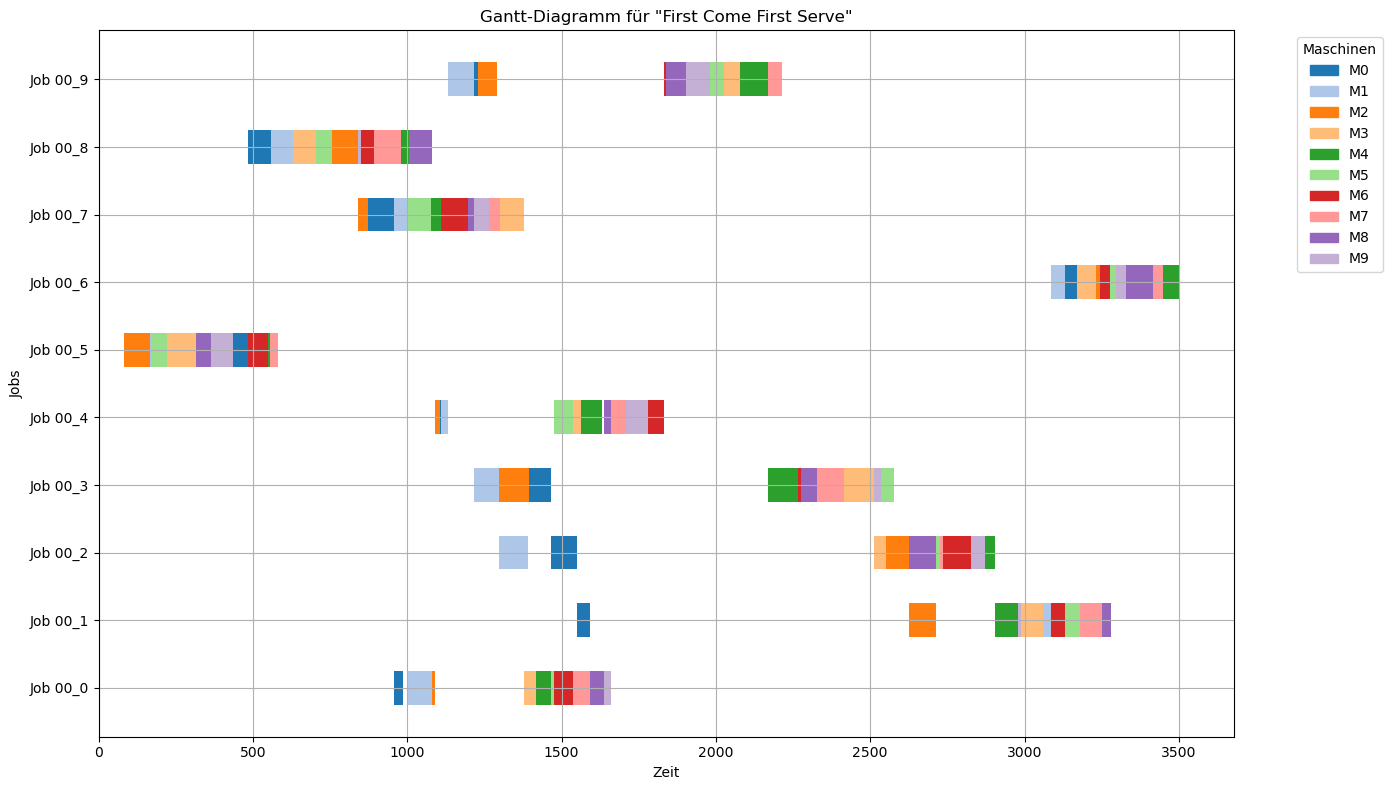

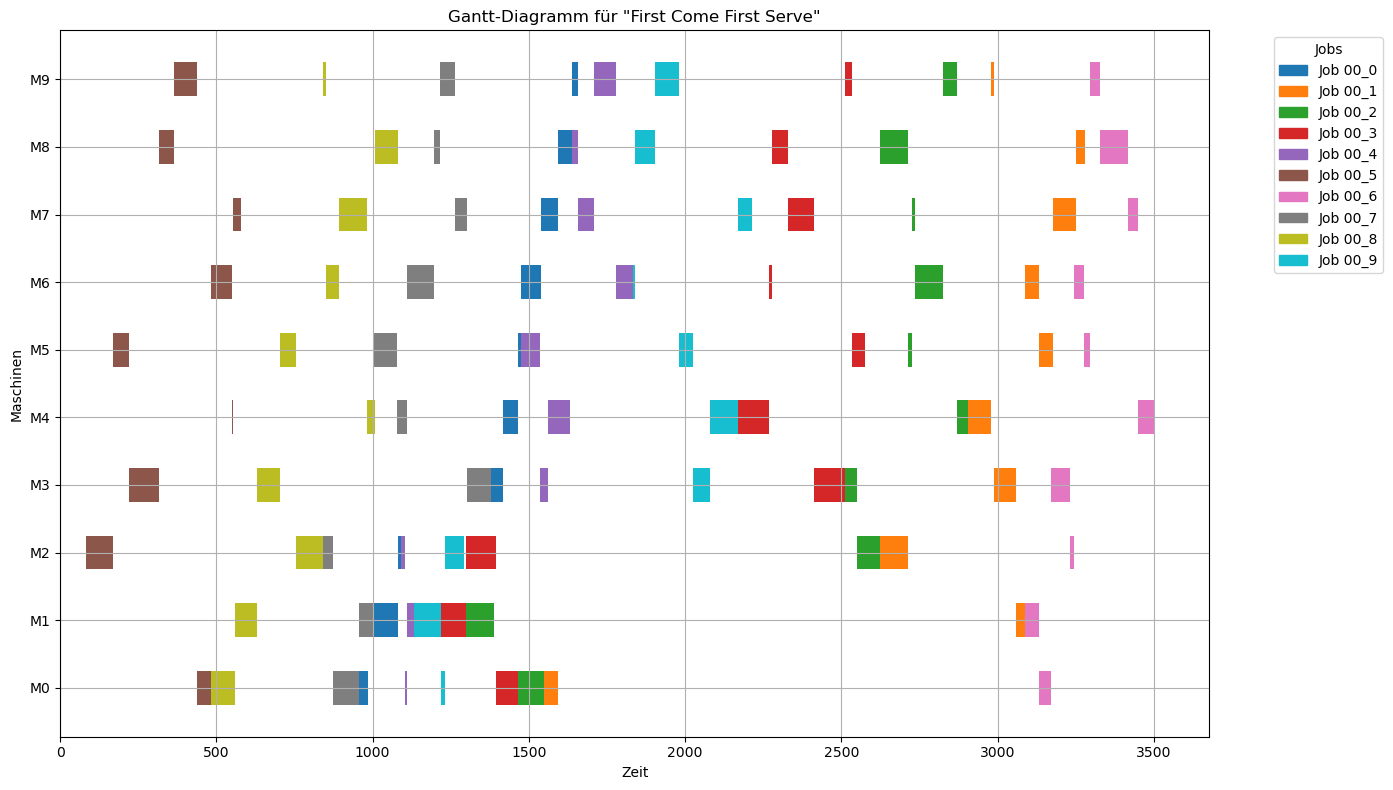

In [28]:
category = "First Come First Serve"

plot_gantt_jobs(df_fcfs, 'Gantt-Diagramm für "{}"'.format(category))
plot_gantt_machines(df_fcfs, 'Gantt-Diagramm für "{}"'.format(category))

In [29]:
check_machine_conflicts(df_fcfs)
check_job_machine_sequence_dict(df_fcfs, day_0)

Gefundene Konflikte auf Maschinen: 0

Anzahl verletzter Job-Maschinen-Reihenfolgen: 0


True

### b) HiGHS

In [31]:
import pulp
import pandas as pd

def solve_jobshop_optimal(job_dict, df_arrivals, solver_time_limit=300):
    job_names = list(job_dict.keys())
    num_jobs = len(job_names)
    all_ops = list(job_dict.values())

    # Maschinen extrahieren
    all_machines = {op[0] for job in all_ops for op in job}
    num_machines = len(all_machines)

    # LP-Problem definieren
    prob = pulp.LpProblem("JobShop_Optimal_HiGHS", pulp.LpMinimize)

    # Variablen: Startzeiten
    starts = {
        (j, o): pulp.LpVariable(f"start_{j}_{o}", lowBound=0, cat="Continuous")
        for j in range(num_jobs) for o in range(len(all_ops[j]))
    }

    # Makespan-Variable
    makespan = pulp.LpVariable("makespan", lowBound=0, cat="Continuous")
    prob += makespan  # Ziel: Makespan minimieren

    # Ankunftszeiten (aus df)
    arrival_times = df_arrivals.set_index("Job-ID")["Ankunftszeit (Minuten)"].to_dict()

    # Technologische Reihenfolge inkl. Ankunftszeit
    for j, job_name in enumerate(job_names):
        job = job_dict[job_name]
        prob += starts[(j, 0)] >= arrival_times[job_name]
        for o in range(1, len(job)):
            d_prev = job[o - 1][1]
            prob += starts[(j, o)] >= starts[(j, o - 1)] + d_prev

    # Maschinenkonflikte
    bigM = 1e5
    for m in all_machines:
        ops = [(j, o, d) for j in range(num_jobs)
               for o, (mach, d) in enumerate(all_ops[j]) if mach == m]
        for i in range(len(ops)):
            j1, o1, d1 = ops[i]
            for j2, o2, d2 in ops[i + 1:]:
                if j1 != j2:
                    y = pulp.LpVariable(f"y_{j1}_{o1}_{j2}_{o2}", cat="Binary")
                    prob += starts[(j1, o1)] + d1 <= starts[(j2, o2)] + bigM * (1 - y)
                    prob += starts[(j2, o2)] + d2 <= starts[(j1, o1)] + bigM * y

    # Makespan-Bedingung
    for j in range(num_jobs):
        last_op = len(all_ops[j]) - 1
        prob += makespan >= starts[(j, last_op)] + all_ops[j][last_op][1]

    # Solver starten
    solver = pulp.HiGHS_CMD(msg=True, timeLimit=solver_time_limit)
    prob.solve(solver)

    # Ergebnis extrahieren
    schedule_data = []
    for (j, o), var in sorted(starts.items()):
        start = var.varValue
        if start is not None:
            machine, duration = all_ops[j][o]
            end = start + duration
            schedule_data.append({
                "Job": job_names[j],  # verwende den echten Namen, z. B. "job 00_3"
                "Machine": f"M{machine}",
                "Start": round(start, 1),
                "Duration": duration,
                "End": round(end, 1)
            })

    df_schedule = pd.DataFrame(schedule_data)
    makespan_value = round(pulp.value(makespan), 2)

    return df_schedule, makespan_value

In [32]:
df_schedule_highs, opt_makespan = solve_jobshop_optimal(day_0, df_arrivals_first_day)
print(f"Optimaler Makespan: {opt_makespan} Zeiteinheiten")

Optimaler Makespan: 1346.13 Zeiteinheiten


In [33]:
df_schedule_highs

,Job,Machine,Start,Duration,End
0,Job 00_0,M0,410.6,29,439.6
1,Job 00_0,M1,443.6,78,521.6
2,Job 00_0,M2,658.1,9,667.1
3,Job 00_0,M3,728.1,36,764.1
4,Job 00_0,M4,808.2,49,857.2
...,...,...,...,...,...
95,Job 00_9,M9,543.2,76,619.2
96,Job 00_9,M5,619.2,47,666.2
97,Job 00_9,M3,666.2,52,718.2
98,Job 00_9,M4,718.2,90,808.2


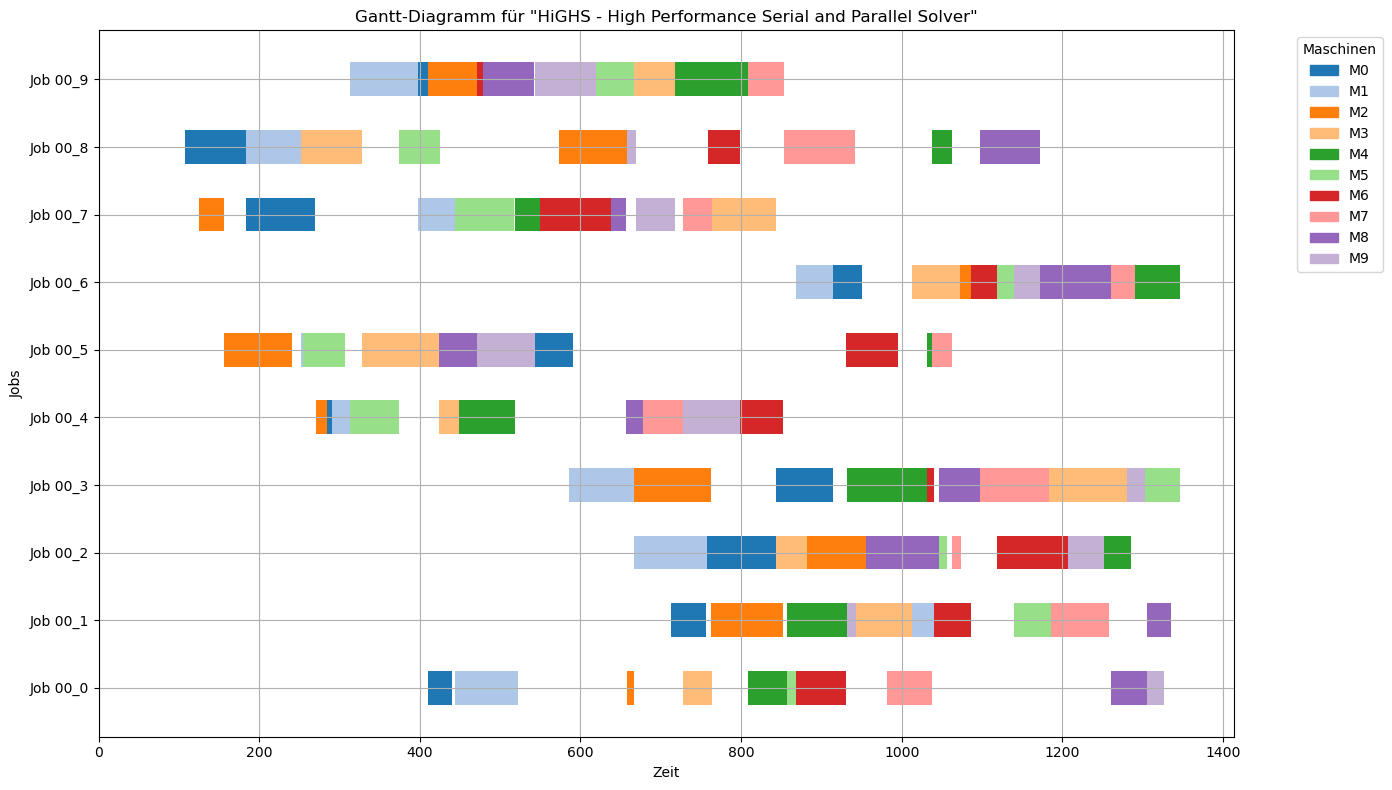

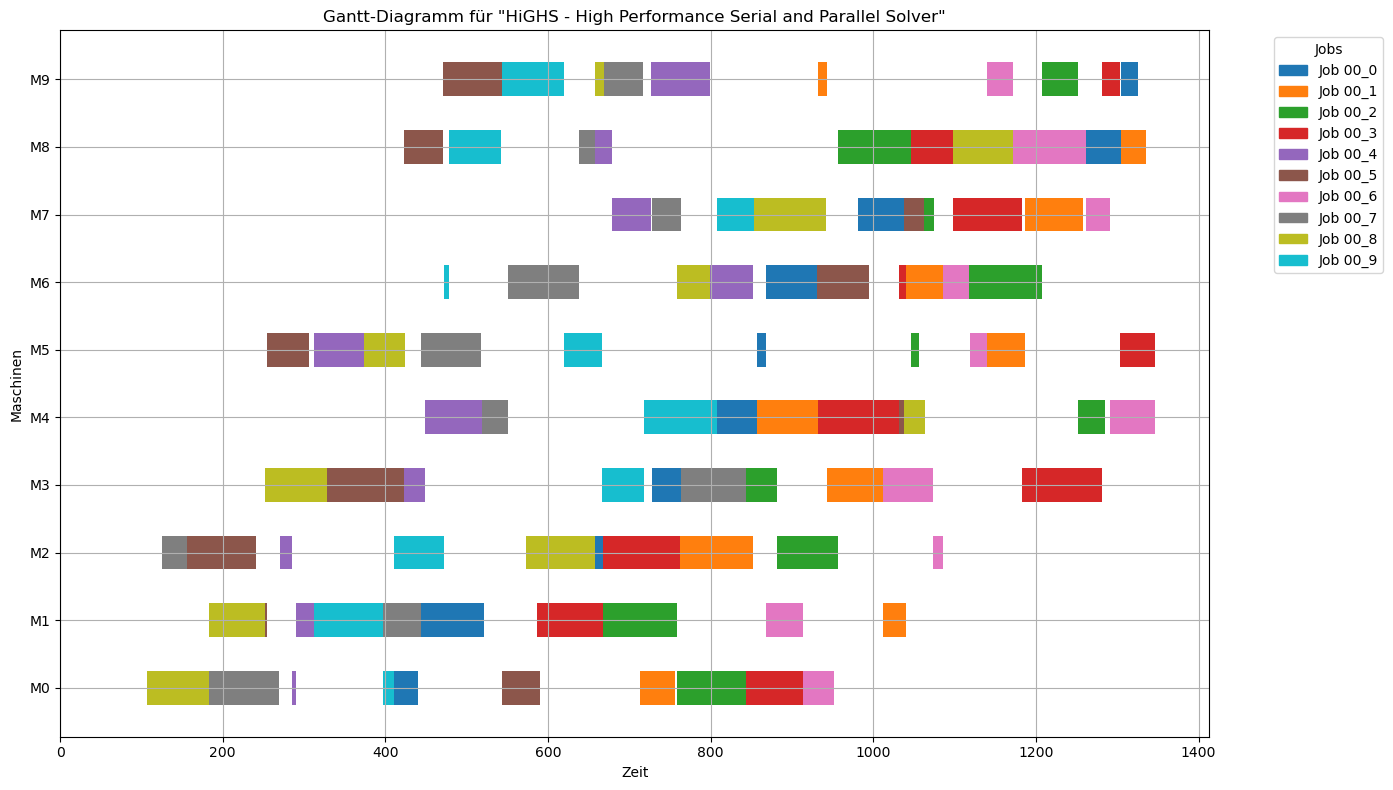

In [34]:
df = df_schedule_highs
category = "HiGHS - High Performance Serial and Parallel Solver"

plot_gantt_jobs(df, 'Gantt-Diagramm für "{}"'.format(category))
plot_gantt_machines(df, 'Gantt-Diagramm für "{}"'.format(category))

In [35]:
check_machine_conflicts(df_schedule_highs)
check_job_machine_sequence_dict(df_schedule_highs, day_0)

Gefundene Konflikte auf Maschinen: 0

Anzahl verletzter Job-Maschinen-Reihenfolgen: 0


True

In [36]:
max(df_schedule_highs.End)

1346.1

### Export

In [38]:
# Nach Startzeit sortieren
df_schedule_highs = df_schedule_highs.sort_values(by="Start").reset_index(drop=True)
df_schedule_highs

,Job,Machine,Start,Duration,End
0,Job 00_8,M0,107.2,76,183.2
1,Job 00_7,M2,125.3,31,156.3
2,Job 00_5,M2,156.3,84,240.3
3,Job 00_7,M0,183.2,86,269.2
4,Job 00_8,M1,183.2,69,252.2
...,...,...,...,...,...
95,Job 00_3,M9,1281.1,22,1303.1
96,Job 00_6,M4,1291.1,55,1346.1
97,Job 00_3,M5,1303.1,43,1346.1
98,Job 00_0,M9,1305.1,21,1326.1


In [39]:
df_schedule_highs.to_csv("output/schedule_day0.csv", index = False)